In [44]:
import pandas as pd
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [45]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [46]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [47]:
inspector = inspect(engine)
inspector.get_table_names()

['measurements', 'stations']

In [48]:
engine.execute("select * from measurements limit 10").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-07', 0.06, 70),
 (6, 'USC00519397', '2010-01-08', 0.0, 64),
 (7, 'USC00519397', '2010-01-09', 0.0, 68),
 (8, 'USC00519397', '2010-01-10', 0.0, 73),
 (9, 'USC00519397', '2010-01-11', 0.01, 64),
 (10, 'USC00519397', '2010-01-12', 0.0, 61)]

In [49]:
engine.execute("select * from stations limit 5").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [50]:
inspector = inspect(engine)
columns = inspector.get_columns('measurements')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs INTEGER


In [51]:
inspector = inspect(engine)
columns = inspector.get_columns('stations')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [52]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurements
Station = Base.classes.stations
session = Session(engine)

In [56]:
# Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [67]:
prcp_data = session.query(Measurement.date, func.sum(Measurement.prcp)).filter(Measurement.date > '2016-09-24').\
    group_by(Measurement.date).order_by(Measurement.date).all()
prcp_data[:15]

[('2016-09-25', 0.18000000000000002),
 ('2016-09-26', 3.34),
 ('2016-09-27', 2.7199999999999998),
 ('2016-09-28', 0.26),
 ('2016-09-29', 5.980000000000001),
 ('2016-09-30', 2.3),
 ('2016-10-01', 2.9000000000000004),
 ('2016-10-02', 1.44),
 ('2016-10-03', 1.3800000000000001),
 ('2016-10-04', 6.9799999999999995),
 ('2016-10-05', 1.6400000000000001),
 ('2016-10-06', 0.32),
 ('2016-10-07', 0.02),
 ('2016-10-08', 0.08),
 ('2016-10-09', 0.0)]

In [68]:
# Unpack the dates and meaasurements into separate lists
Dates = [(row[0]) for row in prcp_data]
Precipitation = [row[1] for row in prcp_data]

df = pd.DataFrame(prcp_data, columns=['Dates', 'Precipitation'])
df.set_index('Dates', inplace=True)
df.head()

,Precipitation
Dates,
2016-09-25,0.18
2016-09-26,3.34
2016-09-27,2.72
2016-09-28,0.26
2016-09-29,5.98


<IPython.core.display.Javascript object>


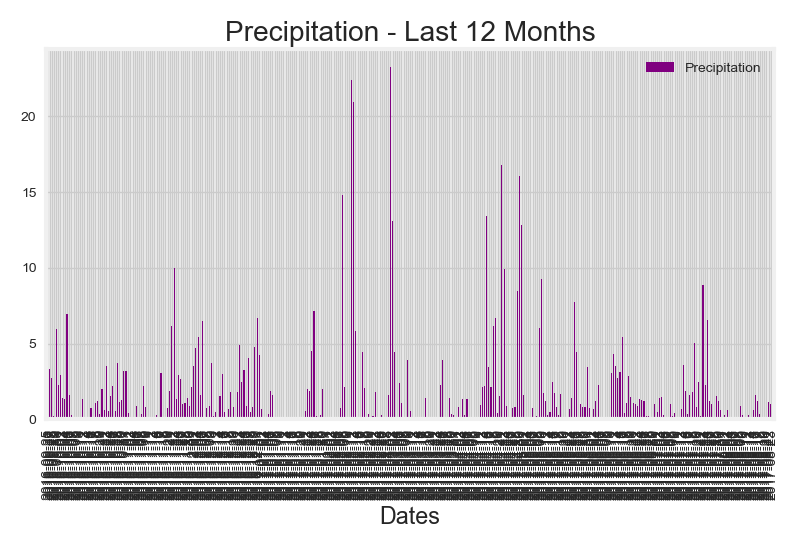

In [70]:
df.plot.bar(title="Precipitation - Last 12 Months", color="purple")
plt.tight_layout()
plt.show()